<a href="https://colab.research.google.com/github/AvellinaLeong/NHM-Nannofossil-Segmentation-Project/blob/main/02_Preprocess_Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalise Training Images to input into Mask R-CNN

Goal: to make the pixel value range between 0 and 1

Look through entire training dataset and save new normalised images to a folder called "normalised_train" (located in same place as train, test and val folders).

Ensure that COCO JSON training dataset annotation file is also present in the normalised_train folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# set script location to own development space
MY_DEVELOPMENT_SPACE = '/content/drive/MyDrive/development/avellina/'
import os
os.chdir(MY_DEVELOPMENT_SPACE)
!pwd
!ls

Mounted at /content/drive/
/content/drive/MyDrive/development/avellina
detectron2  Detectron2_notebooks  Mask-RCNN  Morphometrics_notebooks  output


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [ ]:
train_folder_path = '/content/drive/MyDrive/data/species_53/data/train'
output_folder_path = '/content/drive/MyDrive/data/species_53/data/normalised_train'
os.makedirs(output_folder_path, exist_ok=True)

In [ ]:
# List all files in the training folder
normalisation_image_filenames = os.listdir(train_folder_path)

for filename in normalisation_image_filenames:
    image_path = os.path.join(train_folder_path, filename)
    norm_images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

    if norm_images is not None:
        # Normalize to [0, 1]
        norm_image_normalised = cv2.normalize(norm_images, None, alpha=0, beta=1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        # Convert to uint8 for saving
        scaled_image = (norm_image_normalised * 255).astype(np.uint8)

        # Construct output path for saving
        output_path = os.path.join(output_folder_path, filename)

        # Save normalized image
        cv2.imwrite(output_path, scaled_image)

        print(f"Image '{filename}' normalized and saved as '{output_path}'")
    else:
        print(f"Error: Unable to read image '{filename}'")

Image 'PM_NF_5408_45_37.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5408_45_37.jpeg'
Image 'PM_NF_5065_13_23.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5065_13_23.jpeg'
Image 'PM_NF_5065_29_10.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5065_29_10.jpeg'
Image 'PM_NF_5423_04_26.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5423_04_26.jpeg'
Image 'PM_NF_5065_20_23.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5065_20_23.jpeg'
Image 'PM_NF_5408_22_6.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5408_22_6.jpeg'
Image 'PM_NF_5311_05_31.jpeg' normalized and saved as '/content/drive/MyDrive/data/species_53/data/normalised_train/PM_NF_5311_05_31.jpeg'
Image 'PM_NF_5362_28_11.jpeg'

## Visualise 5 Random Normalised Images

Sanity check


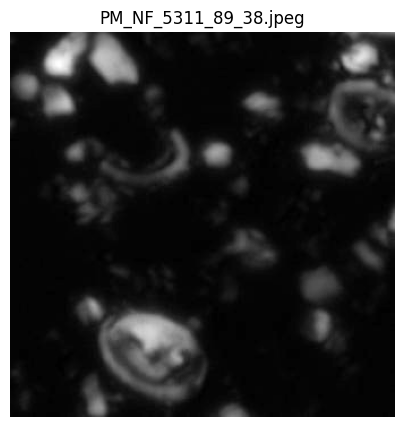

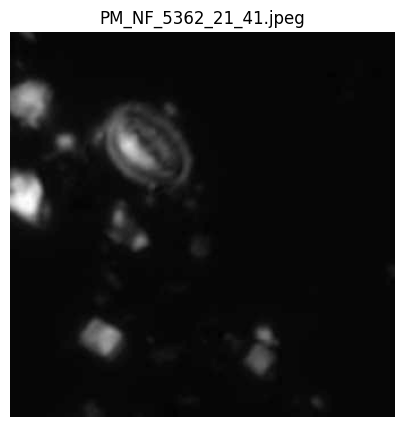

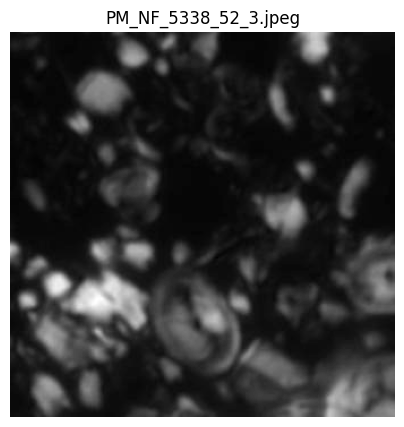

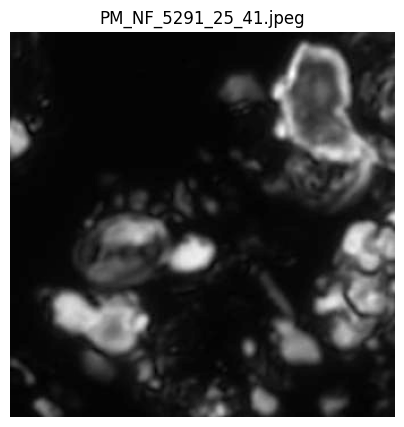

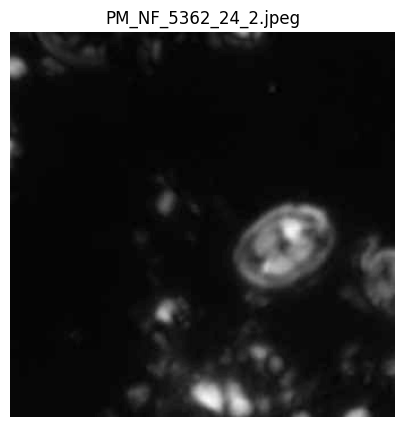

In [ ]:
# Function to display random normalized images
def display_random_images(folder_path, num_images=5):
    image_filenames = os.listdir(folder_path)
    random_images = random.sample(image_filenames, num_images)

    for filename in random_images:
        image_path = os.path.join(folder_path, filename)
        img = mpimg.imread(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray')  # Assuming images are grayscale
        plt.title(filename)
        plt.axis('off')
        plt.show()

# Call the function to display 5 random normalized images from output_folder_path
display_random_images(output_folder_path)